In [1]:
import sys
sys.path.append("..")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import statsmodels.api as sm
import statsmodels.formula.api as smf

from rvc import rvc

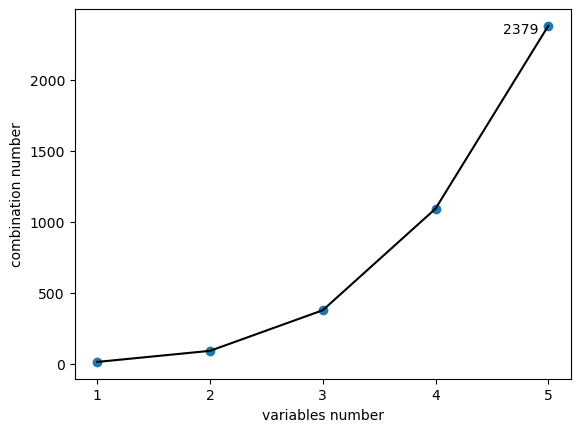

In [10]:
kwargs = {"comb": 5} # defualt
RVC = rvc(**kwargs)
plt.plot(np.arange(1, len(RVC.comb_nCr)), RVC.comb_nCr[1:], color="k")
plt.scatter(np.arange(1, len(RVC.comb_nCr)), RVC.comb_nCr[1:])
plt.xticks([1,2,3,4,5])
plt.xlabel("variables number")
plt.ylabel("combination number")
plt.text(4.6, RVC.comb_nCr[-1]-50, RVC.comb_nCr[-1])
plt.show()

In [2]:
dfx = pd.read_csv("../data/df_g1.csv", index_col=0, usecols=[0, 1, 2, 3, 4, 5])
RVC = rvc()
out = RVC.fit(dfx, "EP")

100%|██████████| 5/5 [00:15<00:00,  3.10s/it]


[Result/X0]:mse,homo:2,4 >> homo


100%|██████████| 5/5 [00:15<00:00,  3.07s/it]


[Result/X1]:mse,homo:4,5 >> homo


100%|██████████| 5/5 [00:15<00:00,  3.13s/it]


[Result/X2]:r is 0.2711404582935719 >> 1d


100%|██████████| 5/5 [00:15<00:00,  3.13s/it]

[Result/X3]:r is 0.1535596796629648 >> 1d


In [15]:
from glob import glob
from bokeh.layouts import column, gridplot
from bokeh.models import HoverTool
from bokeh.models.widgets import Panel, Tabs
from bokeh.plotting import figure, show, output_file, save, ColumnDataSource
from bokeh.palettes import all_palettes

In [16]:
# onShow = kwargs["onShow"] if "onShow" in kwargs else True
# onStore = kwargs["onStore"] if "onStore" in kwargs else True
# dir_store = kwargs["path"] if "path" in kwargs else "."
# output_name = kwargs["output_name"] if "output_name" in kwargs else "."

colors = all_palettes['Spectral'][len(RVC.comb_nCr)-1]
TOOLS = "pan, wheel_zoom, box_zoom, reset"

def createP():
    # p = figure(plot_width=plot_width, plot_height=plot_height, tools=TOOLS)
    p = figure(plot_width=800, plot_height=800, tools=TOOLS)
    p.sizing_mode = 'scale_height'
    p.title.text_font_size = "20pt"
    p.xaxis.axis_label = "MSE"
    p.yaxis.axis_label = "homoscedasticity"
    p.ygrid.grid_line_alpha = 1
    p.background_fill_color = "#dddddd"
    p.background_fill_alpha = 0.5
    tips = [("(x,y)", "($x, $y)"), ("label", "@label")]
    p.add_tools(HoverTool(tooltips=tips, mode="mouse", point_policy="follow_mouse"))
    # p.legend.click_policy = "mute"
    return p

glob_cost = glob(f"{RVC.dir_temp}/{RVC.now}*")
labels = RVC.label_list

list_tab, list_ols, list_opt = [], [], []
for i_col in range(len(glob_cost)):
    p = createP()
    df_out_ = RVC.df_output.iloc[[i_col, -1], :]
    col_origin = df_out_.iloc[:, 1].values  # AH, EP

    cost_ = pd.read_pickle(glob_cost[i_col]).T
    x = cost_[:, 0]  # mse
    y = cost_[:, 2]  # homo

    idx_opt = labels.index(RVC.res_key[i_col])

    for i_ncr in range(len(RVC.comb_nCr)-1):
        x0 = x[RVC.comb_nCr[i_ncr]:RVC.comb_nCr[i_ncr+1]]
        y0 = y[RVC.comb_nCr[i_ncr]:RVC.comb_nCr[i_ncr+1]]
        label0 = labels[RVC.comb_nCr[i_ncr]:RVC.comb_nCr[i_ncr+1]]
        source = ColumnDataSource(data=dict(x=x0, y=y0, label=label0))
        p.circle('x', 'y', line_width=2.5, alpha=0.8, color=colors[i_ncr], source=source)

    p.circle(x[0], y[0], line_width=2.5, size=8, alpha=0.8, color="orange")  # y ~ x
    p.circle(x[idx_opt], y[idx_opt], line_width=2.5, size=8, alpha=0.8, color="red")  # opt

    list_ols.append([x[0], y[0]])
    list_opt.append([x[idx_opt], y[idx_opt]])

    tab = Panel(child=p, title=col_origin[0])
    list_tab.append(tab)

p = createP()
ols, opt = np.array(list_ols), np.array(list_opt)
source_ols = ColumnDataSource(data=dict(x=ols[:, 0], y=ols[:, 1], label=RVC.col_ex))
source_opt = ColumnDataSource(data=dict(x=opt[:, 0], y=opt[:, 1], label=RVC.col_ex))
for i in range(len(ols)):
    xy = np.vstack([ols[i, :], opt[i, :]])
    p.line(xy[:, 0], xy[:, 1], width=2, color="black", line_dash='dotted')
p.circle('x', 'y', line_width=2.5, alpha=0.8, color="orange", source=source_ols)
p.circle('x', 'y', line_width=2.5, alpha=0.8, color="red", source=source_opt)

tab = Panel(child=p, title="Compare")
list_tab.append(tab)

tabs = Tabs(tabs=list_tab)
show(tabs)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [21]:
glob_cost

[]

In [20]:
ols

array([], dtype=float64)

In [12]:
RVC.df_output

,formula,col_origin,gap
X0,"Y ~ + np.square(X0) + np.power(X0, 3)",AT,0.0
X1,Y ~ + np.reciprocal(X1),V,0.0
X2,"Y ~ + np.power(X2, 3)",AP,0.0
X3,Y ~ + X3:np.log(X3),RH,0.0
Y,None,EP,NaN
